# Credit Card Fraud Detection

In [1]:
# Import libraries
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Load data

In [2]:
# data source: https://www.kaggle.com/mlg-ulb/creditcardfraud)
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,85520.0,-1.050744,0.935288,0.852733,1.160638,-0.196647,0.331051,0.113901,0.052232,0.730469,...,0.054207,1.019403,0.354598,0.171959,-1.310557,0.419253,-0.267570,-0.161344,8.49,0
1,57927.0,1.304809,-0.523280,0.224944,-0.187085,-1.281413,-0.894429,-0.834555,-0.021814,-0.189756,...,-0.384447,-0.570307,-0.013528,0.282173,0.179309,1.147533,-0.019572,0.047595,27.10,0
2,32906.0,1.131880,-0.128536,1.154928,1.153765,-0.805890,0.304220,-0.703434,0.287948,0.730599,...,-0.038043,0.036293,-0.052424,-0.005532,0.412210,-0.404397,0.064822,0.023810,9.99,0
3,67854.0,0.670219,1.610644,-1.601980,1.773634,0.957645,-1.714894,0.932065,-0.212100,-0.477260,...,-0.067179,0.090382,0.204985,0.274531,-0.577911,-0.406715,0.272897,0.019916,12.10,0
4,34132.0,-0.664645,0.441596,1.076684,-1.615820,-0.584929,-0.663820,-0.117274,0.385881,-1.536217,...,-0.260474,-0.416955,0.079876,0.096726,-0.664974,0.767296,-0.039244,0.065641,1.00,0


### Data Exploration

In [3]:
# Get number of records with fraud and non-fraud
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("Fraud Records: ", len(fraud))
print("Non Fraud Records: ",len(non_frauds))

Fraud Records:  492
Non Fraud Records:  284315


### Visualize Data

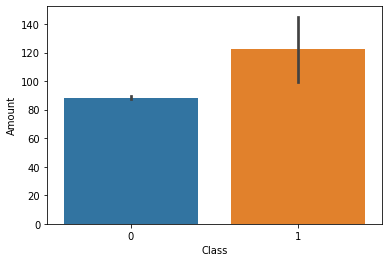

In [4]:
ax = sns.barplot(x="Class", y="Amount", data=df)

### Machine Learning Model

In [5]:
# Separate features and labels
x = df.iloc[:,:-1]
y = df['Class']

# Split data into training and test sets using a 70-30 split of training / testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [6]:
# Train logistic model
logistic = linear_model.LogisticRegression(C=1e5, solver='liblinear')
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Print the accuracy of the model on test data
print('Score: ', logistic.score(X_test, y_test))

Score:  0.9989700736163291
